In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import  StratifiedKFold
from sklearn.metrics import confusion_matrix

input_path = ''
bank_data = pd.read_csv(input_path + 'data.csv')
bank_data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [27]:
bank_data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [28]:
def check_stability(bank_data):
    print(bank_data['Bankrupt?'].value_counts())
    print('-'* 30)
    print('Financially stable: ', round(bank_data['Bankrupt?'].value_counts()[0]/len(bank_data) * 100,2), '% of the dataset')
    print('Financially unstable: ', round(bank_data['Bankrupt?'].value_counts()[1]/len(bank_data) * 100,2), '% of the dataset')

check_stability(bank_data)

Bankrupt?
0    6599
1     220
Name: count, dtype: int64
------------------------------
Financially stable:  96.77 % of the dataset
Financially unstable:  3.23 % of the dataset


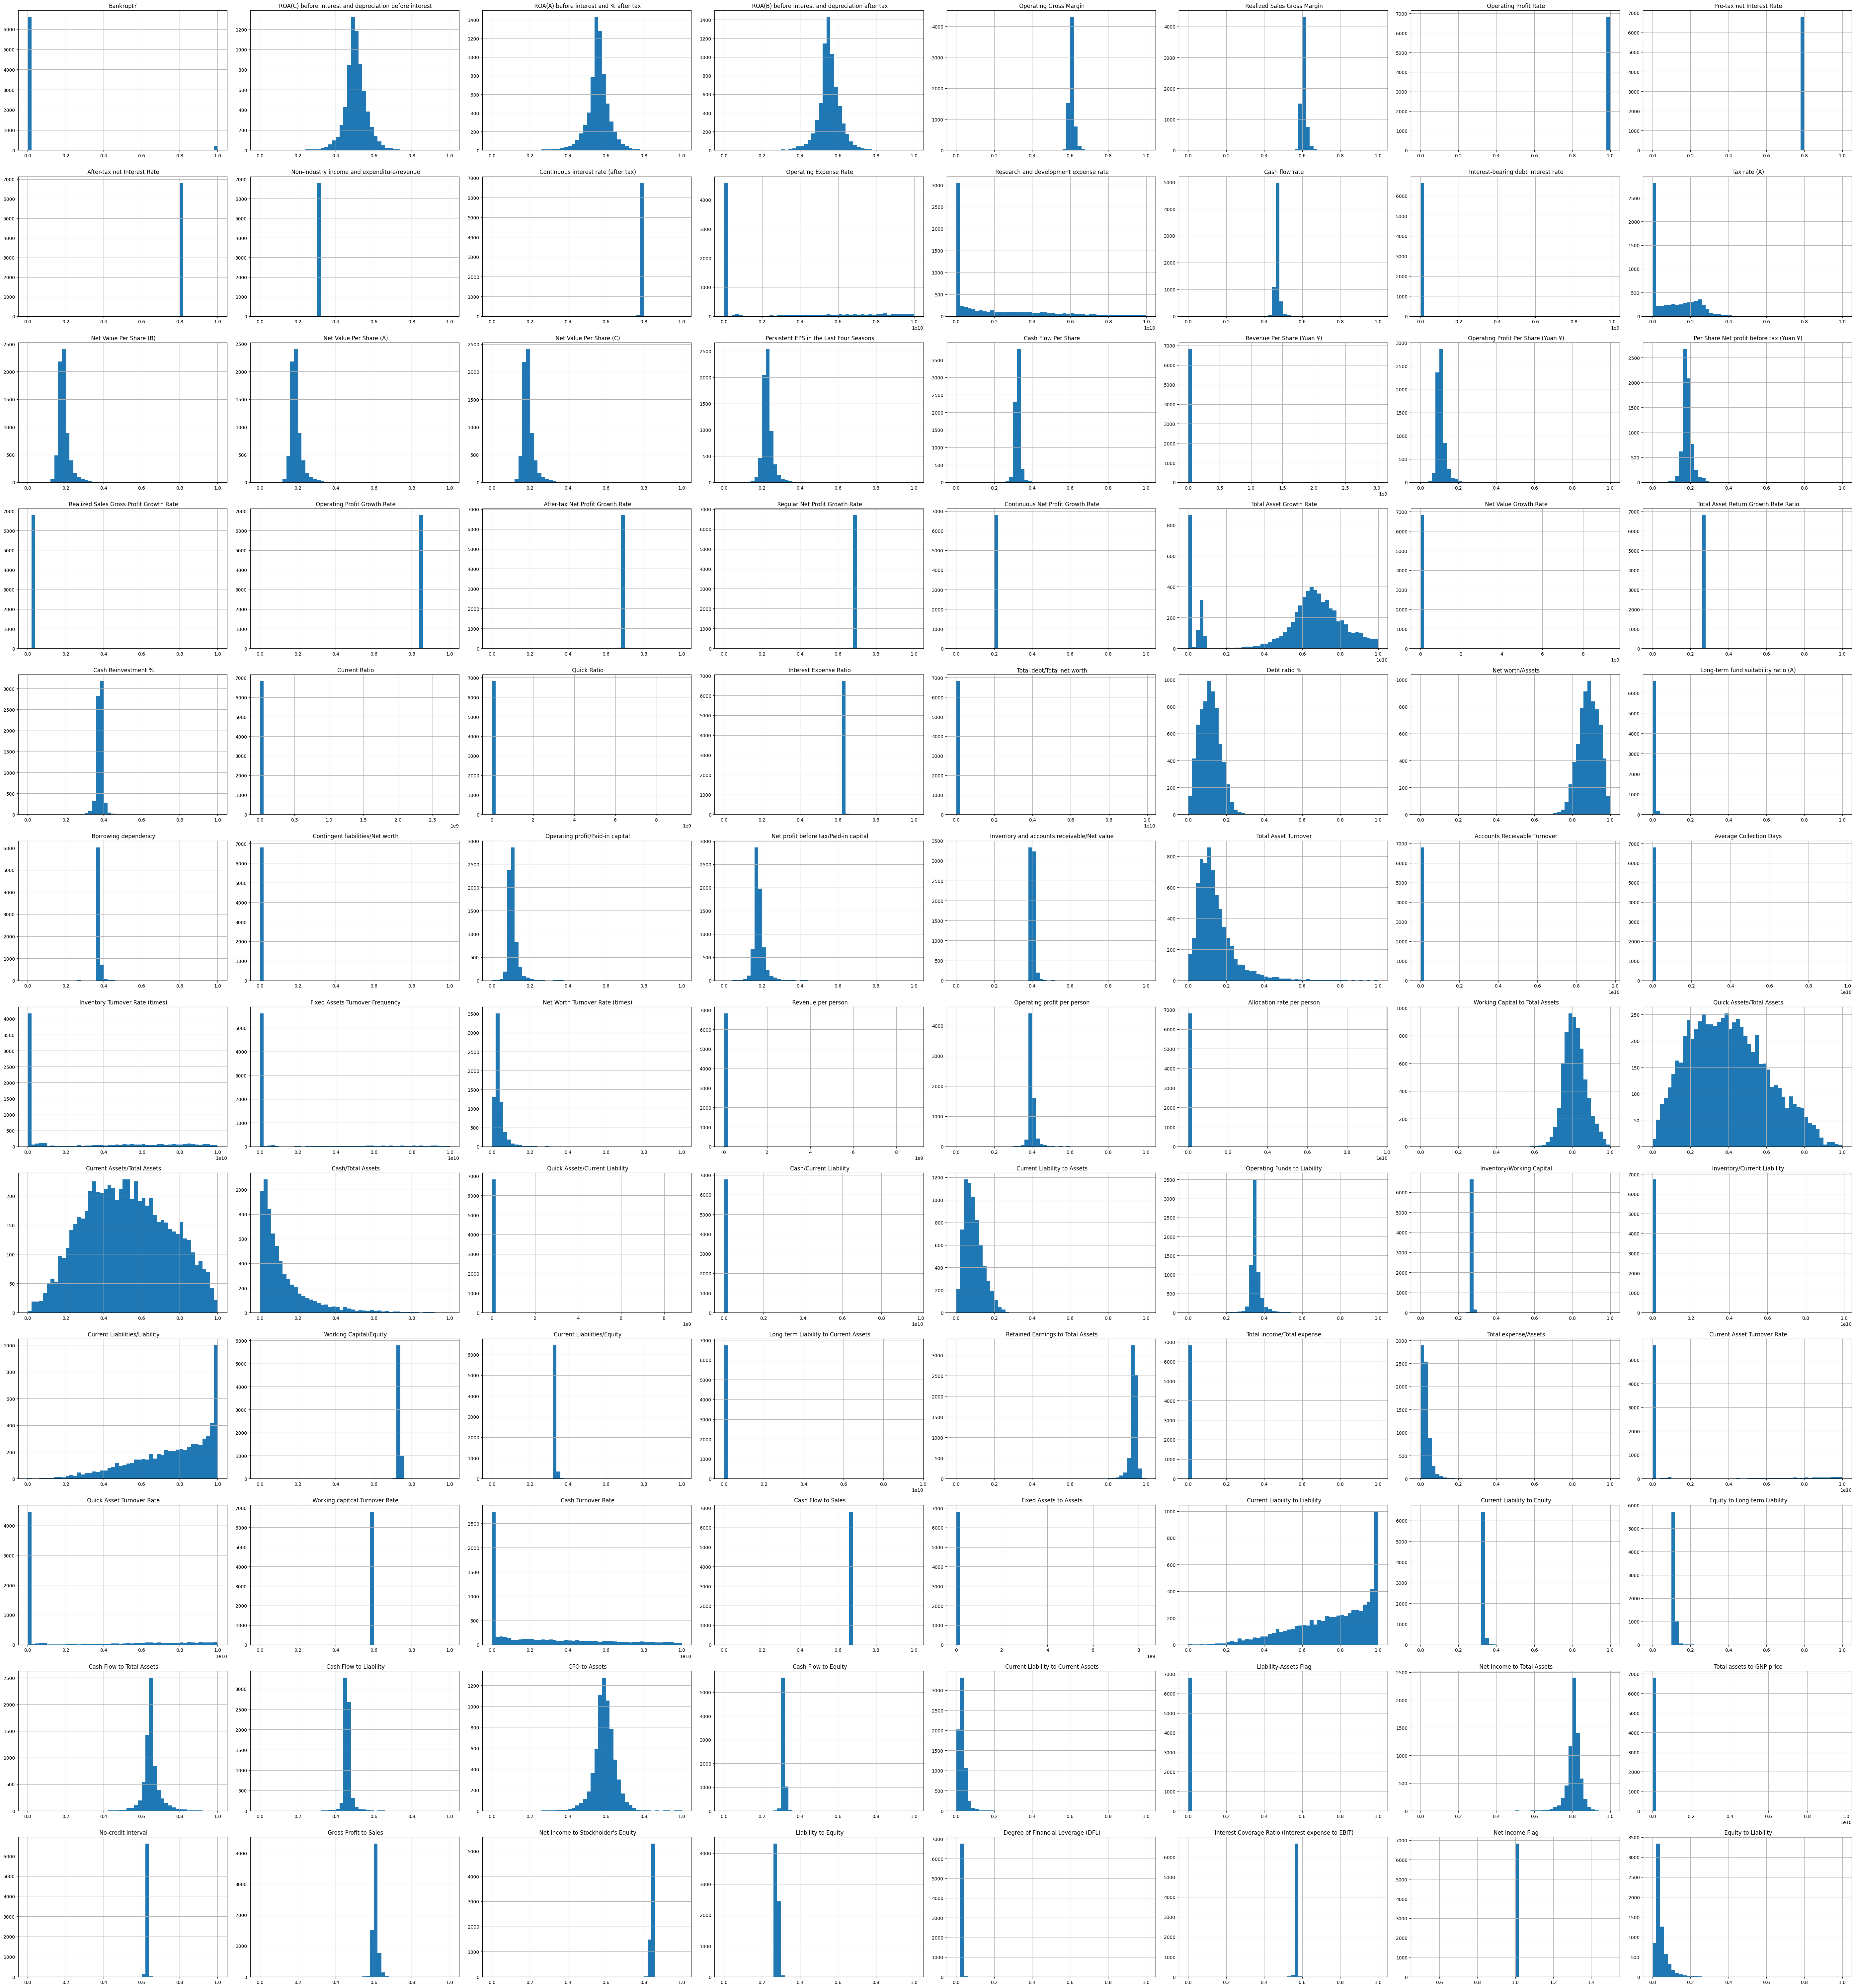

In [5]:
def show_data_distributions_for_each_column(bank_data, numCols):
    numRows = (bank_data.shape[1] + numCols - 1) // numCols
    figsize = (numCols * 7, numRows * 5)
    fig, axes = plt.subplots(numRows, numCols, figsize=figsize)

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Loop through each column and plot its histogram
    for i, col in enumerate(bank_data.columns):
        bank_data[col].hist(ax=axes[i], bins=50)
        axes[i].set_title(col)

    # Remove any unused subplots
    for i in range(len(bank_data.columns), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

show_data_distributions_for_each_column(bank_data, 8)

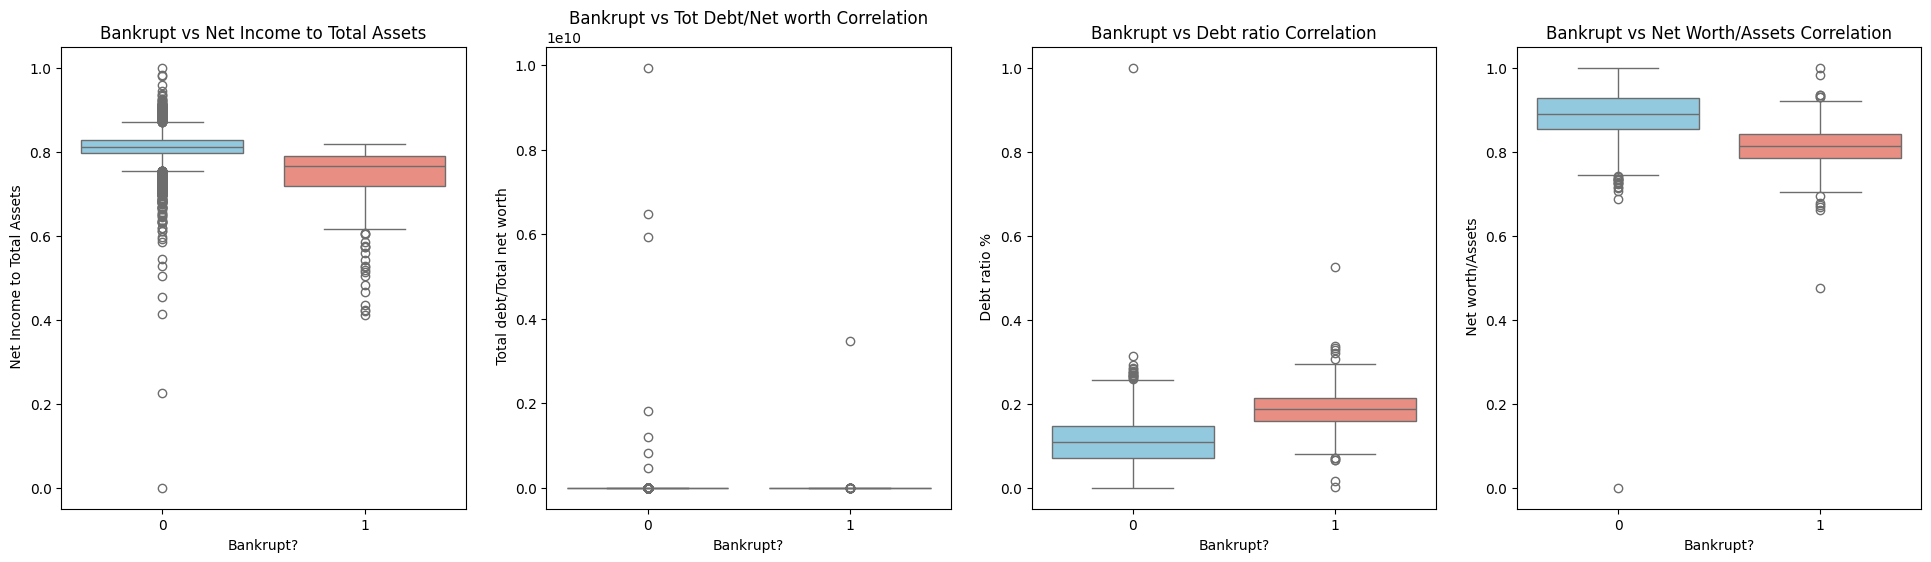

In [6]:
def important_features(bank_data):
    # Define custom colors for 'Bankrupt?' values (0 and 1)
    custom_palette = {'0': "skyblue", '1': "salmon"}

    # Create subplots
    f, axes = plt.subplots(ncols=4, figsize=(24, 6))

    # Boxplot for 'Net Income to Total Assets'
    sns.boxplot(x='Bankrupt?', y=" Net Income to Total Assets", data=bank_data, ax=axes[0], palette=custom_palette)
    axes[0].set_title('Bankrupt vs Net Income to Total Assets')

    # Boxplot for 'Total debt/Total net worth'
    sns.boxplot(x='Bankrupt?', y=" Total debt/Total net worth", data=bank_data, ax=axes[1], palette=custom_palette)
    axes[1].set_title('Bankrupt vs Tot Debt/Net worth Correlation')

    # Boxplot for 'Debt ratio %'
    sns.boxplot(x='Bankrupt?', y=" Debt ratio %", data=bank_data, ax=axes[2], palette=custom_palette)
    axes[2].set_title('Bankrupt vs Debt ratio Correlation')

    # Boxplot for 'Net worth/Assets'
    sns.boxplot(x='Bankrupt?', y=" Net worth/Assets", data=bank_data, ax=axes[3], palette=custom_palette)
    axes[3].set_title('Bankrupt vs Net Worth/Assets Correlation')

    # Show the plot
    plt.show()

important_features(bank_data)

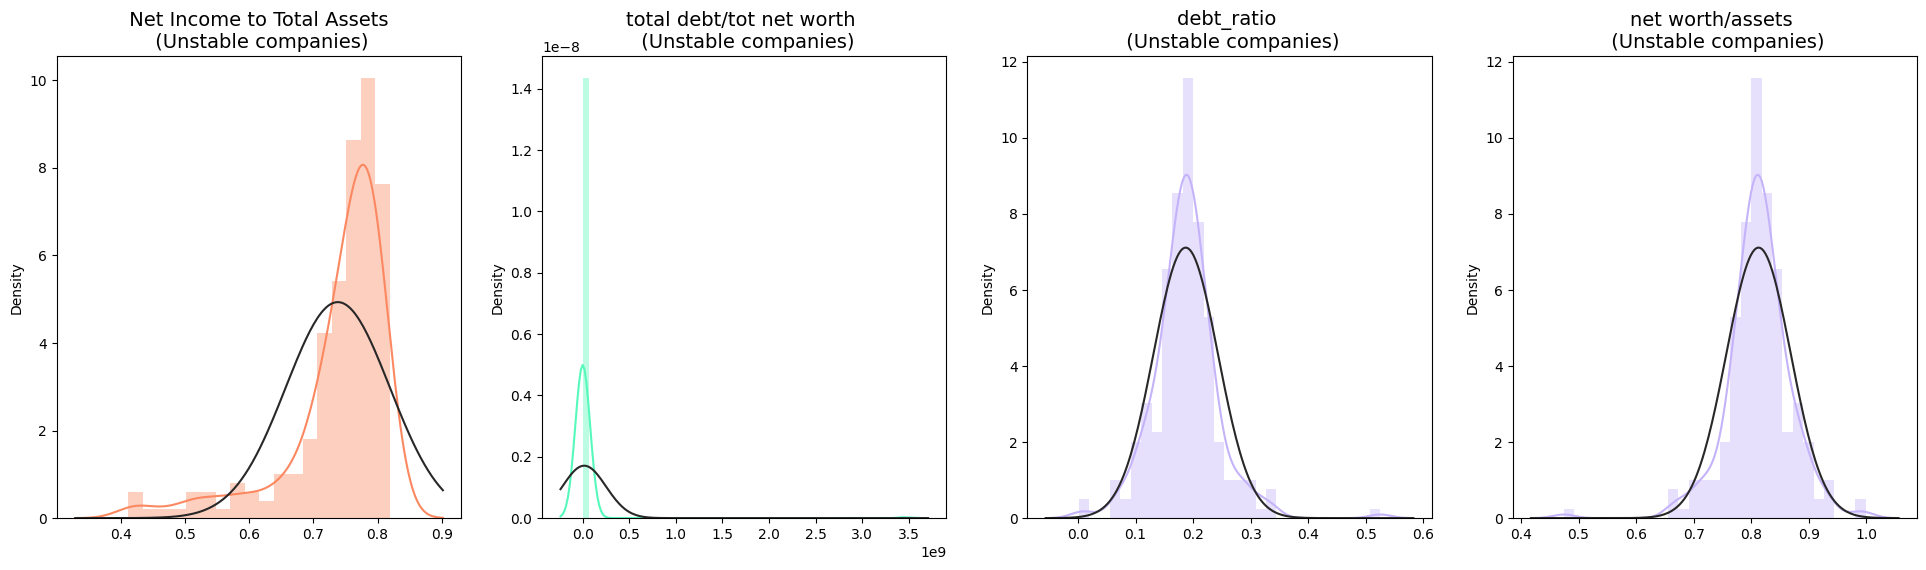

In [7]:
# Plotting the feature distributions for close to bankrputcy companies
def distributions_for_close_to_bankrupt_companies(bank_data):
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

    cash_flow_rate = bank_data[' Net Income to Total Assets'].loc[bank_data['Bankrupt?'] == 1].values
    sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
    ax1.set_title(' Net Income to Total Assets \n (Unstable companies)', fontsize=14)

    tot_debt_net = bank_data[' Total debt/Total net worth'].loc[bank_data['Bankrupt?'] == 1].values
    sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
    ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)


    debt_ratio = bank_data[' Debt ratio %'].loc[bank_data['Bankrupt?'] == 1].values
    sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
    ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

    net_worth_assets = bank_data[' Net worth/Assets'].loc[bank_data['Bankrupt?'] == 1].values
    sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
    ax4.set_title('net worth/assets \n (Unstable companies)', fontsize=14)

    plt.show()

distributions_for_close_to_bankrupt_companies(bank_data)

In [29]:
def extreame_outliers_removal(feature,feature_name,dataset):

    # Identify 25th & 75th quartiles
    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))

    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))

    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)

    return dataset

for col in bank_data:
    X = extreame_outliers_removal(bank_data[col],str(col),bank_data)


Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Cut Off: 0.0
Bankrupt? Lower: 0.0
Bankrupt? Upper: 0.0
Bankrupt? outliers for close to bankruptcy cases: 220
-----------------------------------------------------------------
Quartile 25: 0.476527080388047 | Quartile 75: 0.535562813825379
iqr: 0.05903573343733198
Cut Off: 0.08855360015599797
 ROA(C) before interest and depreciation before interest Lower: 0.38797348023204903
 ROA(C) before interest and depreciation before interest Upper: 0.624116413981377
 ROA(C) before interest and depreciation before interest outliers for close to bankruptcy cases: 391
-----------------------------------------------------------------
Quartile 25: 0.53554295682512 | Quartile 75: 0.58915721761884
iqr: 0.05361426079372
Cut Off: 0.08042139119058
 ROA(A) before interest and % after tax Lower: 0.45512156563454
 ROA(A) before interest and % after tax Upper: 0.66957860880942
 ROA(A) before interest and % after tax outliers for close to bankruptcy cases: 561
-------

In [30]:
# Dividing Data and Labels
labels = X['Bankrupt?']
new_df = X.drop(['Bankrupt?'], axis = 1)

In [31]:
def log_trans(data):

    for col in data:
        skew = data[col].skew()
        if skew > 0.5 or skew < -0.5:
            data[col] = np.log1p(data[col])
        else:
            continue

    return data

data_norm = log_trans(new_df)

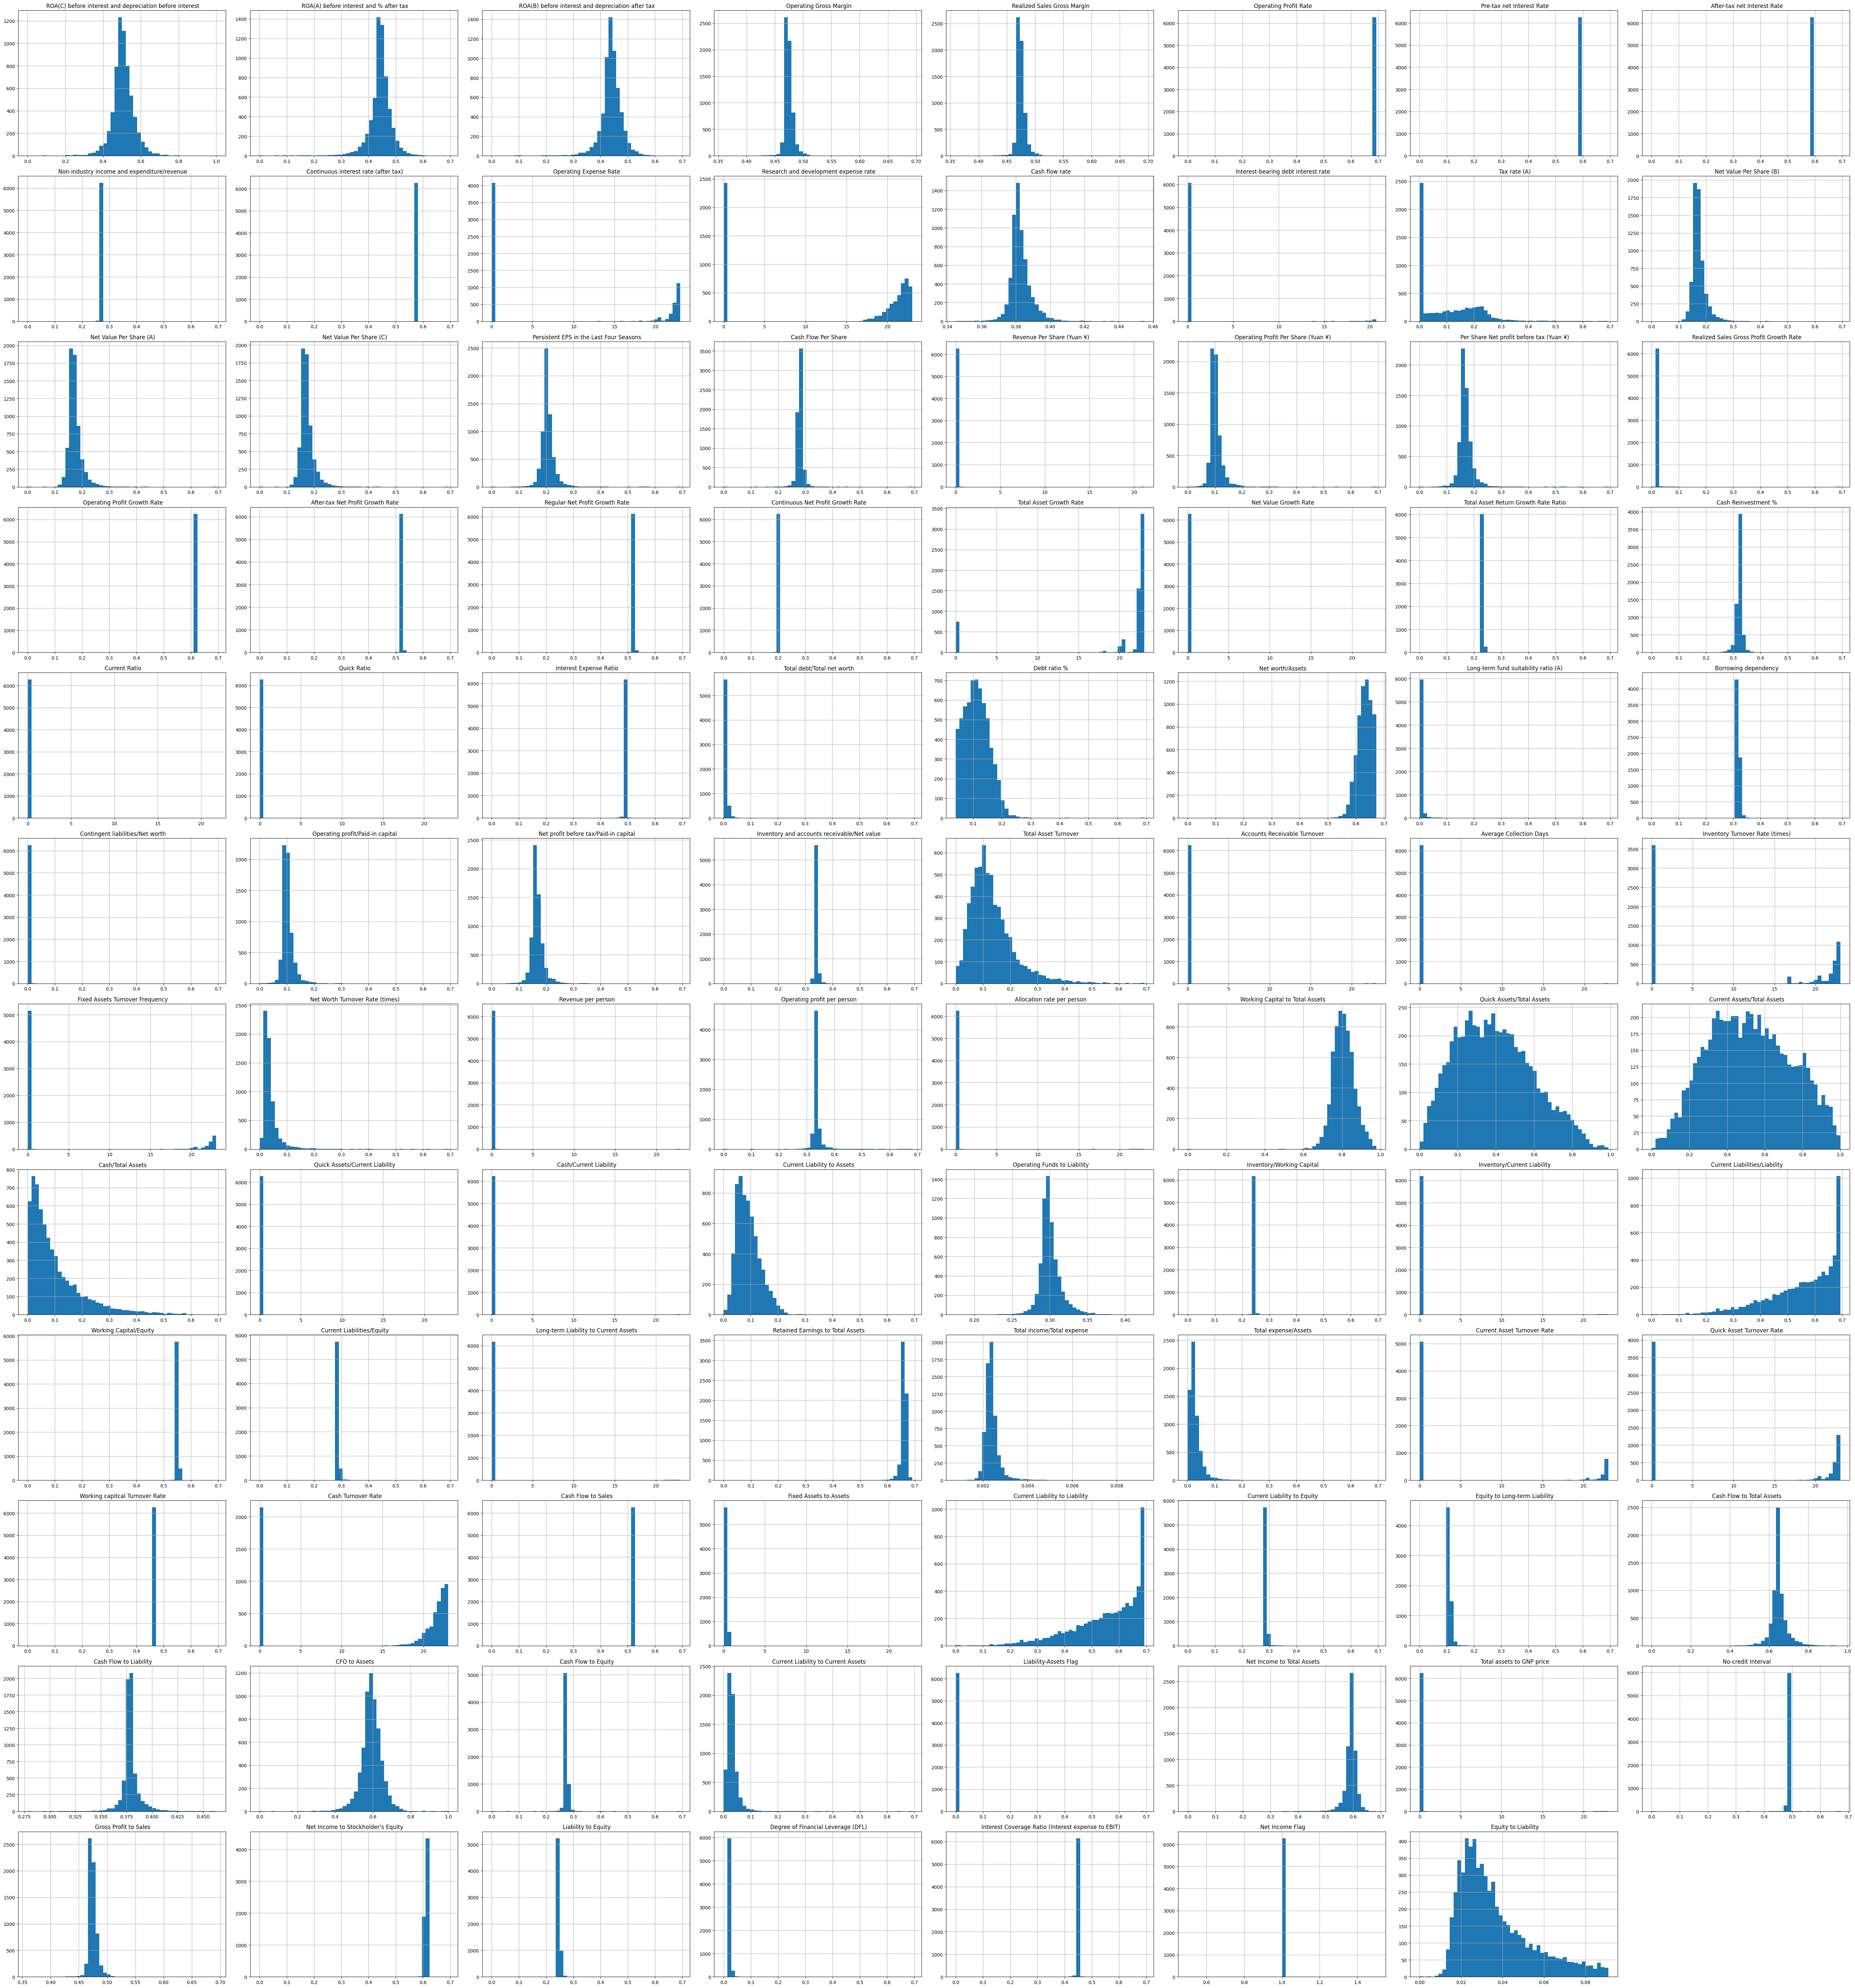

In [11]:
# After pre processing
show_data_distributions_for_each_column(data_norm, 8)

In [42]:
from sklearn.preprocessing import StandardScaler

X = new_df.values
y = labels.values

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

X_train_full, X_val, y_train_full, y_val = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train_full_scaled = scaler.fit_transform(X_train_full)
X_val_scaled = scaler.transform(X_val)

In [45]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=seed)
X_resampled, y_resampled = smote.fit_resample(X_train_full_scaled, y_train_full)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_neural_network(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return model


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

fold = 1
for train_index, test_index in skf.split(X_resampled, y_resampled):
    print(f"Training on fold {fold}...")

    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]

    model = create_neural_network(input_dim=X_train.shape[1])

    # Define callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    checkpoint = ModelCheckpoint(f'best_model_fold_{fold}.keras', monitor='val_loss', save_best_only=True, verbose=0)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001, verbose=0)

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=[early_stop, checkpoint, reduce_lr],
        verbose=0
    )

    # Load the best model
    model.load_weights(f'best_model_fold_{fold}.keras')

    # Predict on the test set
    y_pred_prob = model.predict(X_test)

    best_threshold = 0.5
    best_f1 = 0
    for thresh in np.arange(0.1, 0.9, 0.05):
        temp_pred = (y_pred_prob > thresh).astype(int).reshape(-1)
        current_f1 = f1_score(y_test, temp_pred, zero_division=0)
        if current_f1 > best_f1:
            best_f1 = current_f1
            best_threshold = thresh
    y_pred = (y_pred_prob > best_threshold).astype(int).reshape(-1)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Append metrics
    accuracy_list.append(acc)
    precision_list.append(prec)
    recall_list.append(rec)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)

    print(f"Fold {fold} -- Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")
    fold += 1

# Calculate average metrics across folds
print("\nCross-Validation Results:")
print(f"Accuracy: {np.mean(accuracy_list):.4f} ± {np.std(accuracy_list):.4f}")
print(f"Precision: {np.mean(precision_list):.4f} ± {np.std(precision_list):.4f}")
print(f"Recall: {np.mean(recall_list):.4f} ± {np.std(recall_list):.4f}")
print(f"F1 Score: {np.mean(f1_list):.4f} ± {np.std(f1_list):.4f}")


Training on fold 1...
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 1 -- Accuracy: 0.9876, Precision: 0.9774, Recall: 0.9983, F1 Score: 0.9877, ROC-AUC: 0.9945
Training on fold 2...


In [41]:
# After cross-validation, evaluate on the validation set
print("\nEvaluating on the Validation Set...")

# Predict on the validation set
y_val_pred_prob = model.predict(X_val_scaled)
y_val_pred = (y_val_pred_prob > best_threshold).astype(int).reshape(-1)

# Calculate metrics on the validation set
val_acc = accuracy_score(y_val, y_val_pred)
val_prec = precision_score(y_val, y_val_pred, zero_division=0)
val_rec = recall_score(y_val, y_val_pred, zero_division=0)
val_f1 = f1_score(y_val, y_val_pred, zero_division=0)
val_roc_auc = roc_auc_score(y_val, y_val_pred_prob)

# Print validation metrics
print(f"Validation Set -- Accuracy: {val_acc:.4f}, Precision: {val_prec:.4f}, Recall: {val_rec:.4f}, F1 Score: {val_f1:.4f}, ROC-AUC: {val_roc_auc:.4f}")